In [1]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#import packages
import os
import tensorflow as tf
import keras
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/A2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [0]:
#resnet101
model = InceptionV3(weights= 'imagenet', include_top=False, input_tensor=None, input_shape=(224,224,3))

In [7]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [8]:
#adding new layers
x = model.output
x = Flatten()(x)
# add a fully-connected layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.8)(x)
#add logistic layer
predictions = Dense(4, activation='softmax')(x)
#model to train
model = Model(input=model.input, output=predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
for layer in model.layers[:-249]: #freeze the first 249 layers and unfreeze the rest:
   layer.trainable = False

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [11]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 44s 437ms/step - loss: 1.9513 - acc: 0.3693 - val_loss: 1.2140 - val_acc: 0.5125
Epoch 2/25
100/100 [==============================] - 24s 244ms/step - loss: 1.3582 - acc: 0.5063 - val_loss: 1.1331 - val_acc: 0.6438
Epoch 3/25
100/100 [==============================] - 26s 260ms/step - loss: 1.0520 - acc: 0.6050 - val_loss: 1.4034 - val_acc: 0.5205
Epoch 4/25
100/100 [==============================] - 26s 259ms/step - loss: 0.8811 - acc: 0.6533 - val_loss: 1.0585 - val_acc: 0.6250
Epoch 5/25
100/100 [==============================] - 25s 252ms/step - loss: 0.7331 - acc: 0.7235 - val_loss: 0.8602 - val_acc: 0.5753
Epoch 6/25
100/100 [==============================] - 24s 236ms/step - loss: 0.6887 - acc: 0.7312 - val_loss: 0.2568 - val_acc: 0.6575
Epoch 7/25
100/100 [==============================] - 24s 241ms/step - loss: 0.5919 - acc: 0.8003 - val_loss: 0.9618 - val_acc: 0.6250
Epoch 8/25
100/100 [==============================] - 2

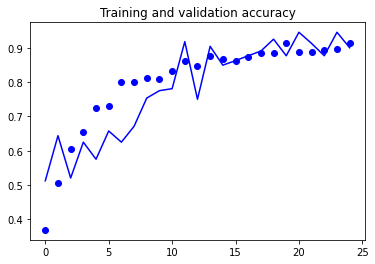

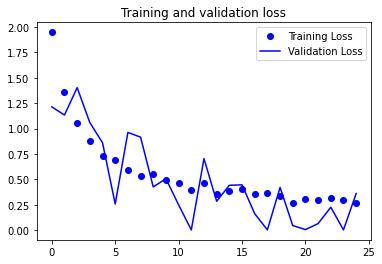

In [12]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
test_acc

14/14 [==============================] - 1s 99ms/step


0.8839285969734192